# Sleep Data Analysis

This notebook analyzes sleep tracking data to uncover patterns and insights in sleep behavior. The data is collected from Garmin smartwatches and includes information such as sleep duration, and sleep stages (light, deep, REM, and awake).

<div></div>

## 1. Setup and Data Loading

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [13]:
sns.set_palette('husl')

# Load data
df = pd.read_json('../../data/raw/sleep_data.json')

# Display first few rows
display(df.head())

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,retro,awakeCount,avgSleepStress,sleepScores,restlessMomentCount,napList
0,2024-07-31T06:05:39.0,2024-07-31T13:27:39.0,2024-07-31,ENHANCED_CONFIRMED_FINAL,5880.0,14520.0,3600.0,2520.0,0.0,14.0,12.0,17.0,False,3.0,8.740000,"{'overallScore': 75, 'qualityScore': 82, 'dura...",40.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,"[{'napTimeSec': 840, 'napStartTimestampGMT': '..."
2,2024-08-02T07:28:20.0,2024-08-02T15:28:48.0,2024-08-02,ENHANCED_CONFIRMED_FINAL,7320.0,13440.0,5760.0,2340.0,0.0,14.0,12.0,16.0,False,2.0,11.990000,"{'overallScore': 82, 'qualityScore': 85, 'dura...",48.0,NaN
3,2024-08-03T07:39:10.0,2024-08-03T14:14:10.0,2024-08-03,ENHANCED_CONFIRMED_FINAL,5820.0,14880.0,2520.0,480.0,0.0,14.0,10.0,18.0,False,0.0,13.230000,"{'overallScore': 76, 'qualityScore': 86, 'dura...",43.0,"[{'napTimeSec': 2046, 'napStartTimestampGMT': ..."
4,2024-08-04T07:43:48.0,2024-08-04T15:00:48.0,2024-08-04,ENHANCED_CONFIRMED_FINAL,5640.0,15660.0,3000.0,1920.0,0.0,15.0,13.0,22.0,False,1.0,20.040001,"{'overallScore': 74, 'qualityScore': 77, 'dura...",37.0,NaN


<div>

</div>

## 2. Data Cleaning & Preprocessing

Clean and preprocess data by:

- Converting dates to datetime format
- Parsing JSON sleep scores
- Creating individual score columns

In [14]:
# Convert the calendarDate column to datetime
df['calendarDate'] = pd.to_datetime(df['calendarDate'])

# Helper function to convert json quotes to double quotes
def clean_json_string(s):
    """Convert string JSON to proper format and handle NaN values."""
    if pd.isna(s):
        return None
    return json.loads(str(s).replace("'", '"'))

# Split sleep scores into separate columns
df['sleepScores'] = df['sleepScores'].apply(clean_json_string)

# Define score columns
score_columns = [
    'overallScore', 'qualityScore', 'durationScore', 
    'recoveryScore', 'deepScore', 'remScore', 'lightScore',
    'awakeningsCountScore', 'awakeTimeScore', 'combinedAwakeScore',
    'restfulnessScore', 'interruptionsScore'
]

# Create new columns for each score
for score in score_columns:
    df[f'score_{score}'] = df['sleepScores'].apply(lambda x: x.get(score) if x else None)

# Extract feedback and insights
df['sleep_feedback'] = df['sleepScores'].apply(lambda x: x.get('feedback') if x else None)
df['sleep_insight'] = df['sleepScores'].apply(lambda x: x.get('insight') if x else None)

# Drop original sleepScores column
df.drop(columns=['sleepScores'], inplace=True)

display(df.head())

,sleepStartTimestampGMT,sleepEndTimestampGMT,calendarDate,sleepWindowConfirmationType,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,...,score_deepScore,score_remScore,score_lightScore,score_awakeningsCountScore,score_awakeTimeScore,score_combinedAwakeScore,score_restfulnessScore,score_interruptionsScore,sleep_feedback,sleep_insight
0,2024-07-31T06:05:39.0,2024-07-31T13:27:39.0,2024-07-31,ENHANCED_CONFIRMED_FINAL,5880.0,14520.0,3600.0,2520.0,0.0,14.0,...,100.0,68.0,86.0,61.0,58.0,59.0,76.0,63.0,POSITIVE_RECOVERING,NONE
1,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
2,2024-08-02T07:28:20.0,2024-08-02T15:28:48.0,2024-08-02,ENHANCED_CONFIRMED_FINAL,7320.0,13440.0,5760.0,2340.0,0.0,14.0,...,100.0,85.0,100.0,74.0,61.0,67.0,72.0,69.0,POSITIVE_LONG_AND_DEEP,POSITIVE_RESTFUL_DAY
3,2024-08-03T07:39:10.0,2024-08-03T14:14:10.0,2024-08-03,ENHANCED_CONFIRMED_FINAL,5820.0,14880.0,2520.0,480.0,0.0,14.0,...,100.0,59.0,80.0,100.0,96.0,98.0,71.0,92.0,NEGATIVE_NOT_ENOUGH_REM,NEGATIVE_LATE_STRENUOUS_EXERCISE
4,2024-08-04T07:43:48.0,2024-08-04T15:00:48.0,2024-08-04,ENHANCED_CONFIRMED_FINAL,5640.0,15660.0,3000.0,1920.0,0.0,15.0,...,100.0,63.0,79.0,87.0,68.0,77.0,82.0,79.0,POSITIVE_DEEP,NONE


<div></div>

## 3. Exploratory Data Analysis (EDA)

Explore dataset's basic characteristics and identify any data quality issues.

In [15]:
# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())

# Date range analysis
date_range = pd.date_range(start=df['calendarDate'].min(), end=df['calendarDate'].max())
missing_dates = set(date_range) - set(df['calendarDate'])

print(f"\nDate Range: {df['calendarDate'].min()} to {df['calendarDate'].max()}")
print(f"Total Days: {(df['calendarDate'].max() - df['calendarDate'].min()).days}")

if missing_dates:
    print("\nMissing dates in dataset:")
    print(sorted(missing_dates))

Dataset Shape: (85, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   sleepStartTimestampGMT       78 non-null     object        
 1   sleepEndTimestampGMT         78 non-null     object        
 2   calendarDate                 78 non-null     datetime64[ns]
 3   sleepWindowConfirmationType  78 non-null     object        
 4   deepSleepSeconds             78 non-null     float64       
 5   lightSleepSeconds            78 non-null     float64       
 6   remSleepSeconds              77 non-null     float64       
 7   awakeSleepSeconds            78 non-null     float64       
 8   unmeasurableSeconds          78 non-null     float64       
 9   averageRespiration           78 non-null     float64       
 10  lowestRespiration            78 non-null     float64       
 11  highestR

,calendarDate,deepSleepSeconds,lightSleepSeconds,remSleepSeconds,awakeSleepSeconds,unmeasurableSeconds,averageRespiration,lowestRespiration,highestRespiration,awakeCount,...,score_durationScore,score_recoveryScore,score_deepScore,score_remScore,score_lightScore,score_awakeningsCountScore,score_awakeTimeScore,score_combinedAwakeScore,score_restfulnessScore,score_interruptionsScore
count,78,78.000000,78.000000,77.000000,78.000000,78.0,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2024-09-19 22:46:09.230769152,5938.461538,14300.769231,4540.519481,1267.692308,0.0,14.346154,11.333333,18.769231,1.282051,...,77.038462,76.948718,96.525641,72.025641,88.871795,83.384615,81.423077,82.166667,71.294872,79.692308
min,2024-07-31 00:00:00,2580.000000,7920.000000,660.000000,0.000000,0.0,13.000000,6.000000,16.000000,0.000000,...,31.000000,12.000000,71.000000,0.000000,60.000000,0.000000,0.000000,0.000000,43.000000,16.000000
25%,2024-08-20 06:00:00,5055.000000,12135.000000,3480.000000,495.000000,0.0,14.000000,11.000000,17.000000,0.000000,...,69.250000,68.250000,100.000000,67.000000,81.500000,74.000000,69.250000,72.000000,68.000000,72.000000
50%,2024-09-09 12:00:00,6000.000000,14430.000000,4440.000000,900.000000,0.0,14.000000,12.000000,19.000000,1.000000,...,76.500000,77.000000,100.000000,73.000000,90.000000,87.000000,87.000000,85.000000,72.000000,81.000000
75%,2024-10-27 18:00:00,6870.000000,16470.000000,5700.000000,1845.000000,0.0,15.000000,12.000000,20.000000,2.000000,...,87.500000,88.000000,100.000000,84.000000,99.750000,100.000000,95.750000,95.500000,75.750000,89.000000
max,2024-11-16 00:00:00,10380.000000,21540.000000,12120.000000,10320.000000,0.0,16.000000,13.000000,23.000000,8.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,85.000000,95.000000
std,NaN,1422.621576,3093.753140,1996.734107,1317.105172,0.0,0.577206,1.335496,1.808516,1.247308,...,16.647173,16.194353,8.145948,19.224561,10.479862,15.939195,17.522912,16.214805,7.178809,12.503826



Missing Values:


sleepStartTimestampGMT          7
sleepEndTimestampGMT            7
calendarDate                    7
sleepWindowConfirmationType     7
deepSleepSeconds                7
lightSleepSeconds               7
remSleepSeconds                 8
awakeSleepSeconds               7
unmeasurableSeconds             7
averageRespiration              7
lowestRespiration               7
highestRespiration              7
retro                           0
awakeCount                      7
avgSleepStress                  7
restlessMomentCount             7
napList                        75
score_overallScore              7
score_qualityScore              7
score_durationScore             7
score_recoveryScore             7
score_deepScore                 7
score_remScore                  7
score_lightScore                7
score_awakeningsCountScore      7
score_awakeTimeScore            7
score_combinedAwakeScore        7
score_restfulnessScore          7
score_interruptionsScore        7
sleep_feedback


Date Range: 2024-07-31 00:00:00 to 2024-11-16 00:00:00
Total Days: 108

Missing dates in dataset:
[Timestamp('2024-08-01 00:00:00'), Timestamp('2024-08-26 00:00:00'), Timestamp('2024-09-20 00:00:00'), Timestamp('2024-09-21 00:00:00'), Timestamp('2024-09-22 00:00:00'), Timestamp('2024-09-23 00:00:00'), Timestamp('2024-09-24 00:00:00'), Timestamp('2024-09-25 00:00:00'), Timestamp('2024-09-26 00:00:00'), Timestamp('2024-09-27 00:00:00'), Timestamp('2024-09-28 00:00:00'), Timestamp('2024-09-29 00:00:00'), Timestamp('2024-09-30 00:00:00'), Timestamp('2024-10-01 00:00:00'), Timestamp('2024-10-02 00:00:00'), Timestamp('2024-10-03 00:00:00'), Timestamp('2024-10-04 00:00:00'), Timestamp('2024-10-05 00:00:00'), Timestamp('2024-10-06 00:00:00'), Timestamp('2024-10-07 00:00:00'), Timestamp('2024-10-08 00:00:00'), Timestamp('2024-10-09 00:00:00'), Timestamp('2024-10-10 00:00:00'), Timestamp('2024-10-11 00:00:00'), Timestamp('2024-10-12 00:00:00'), Timestamp('2024-10-13 00:00:00'), Timestamp('2024-

<div></div>

## 4. Sleep Metrics Analysis

Analysis of key sleep metrics including duration and stages.

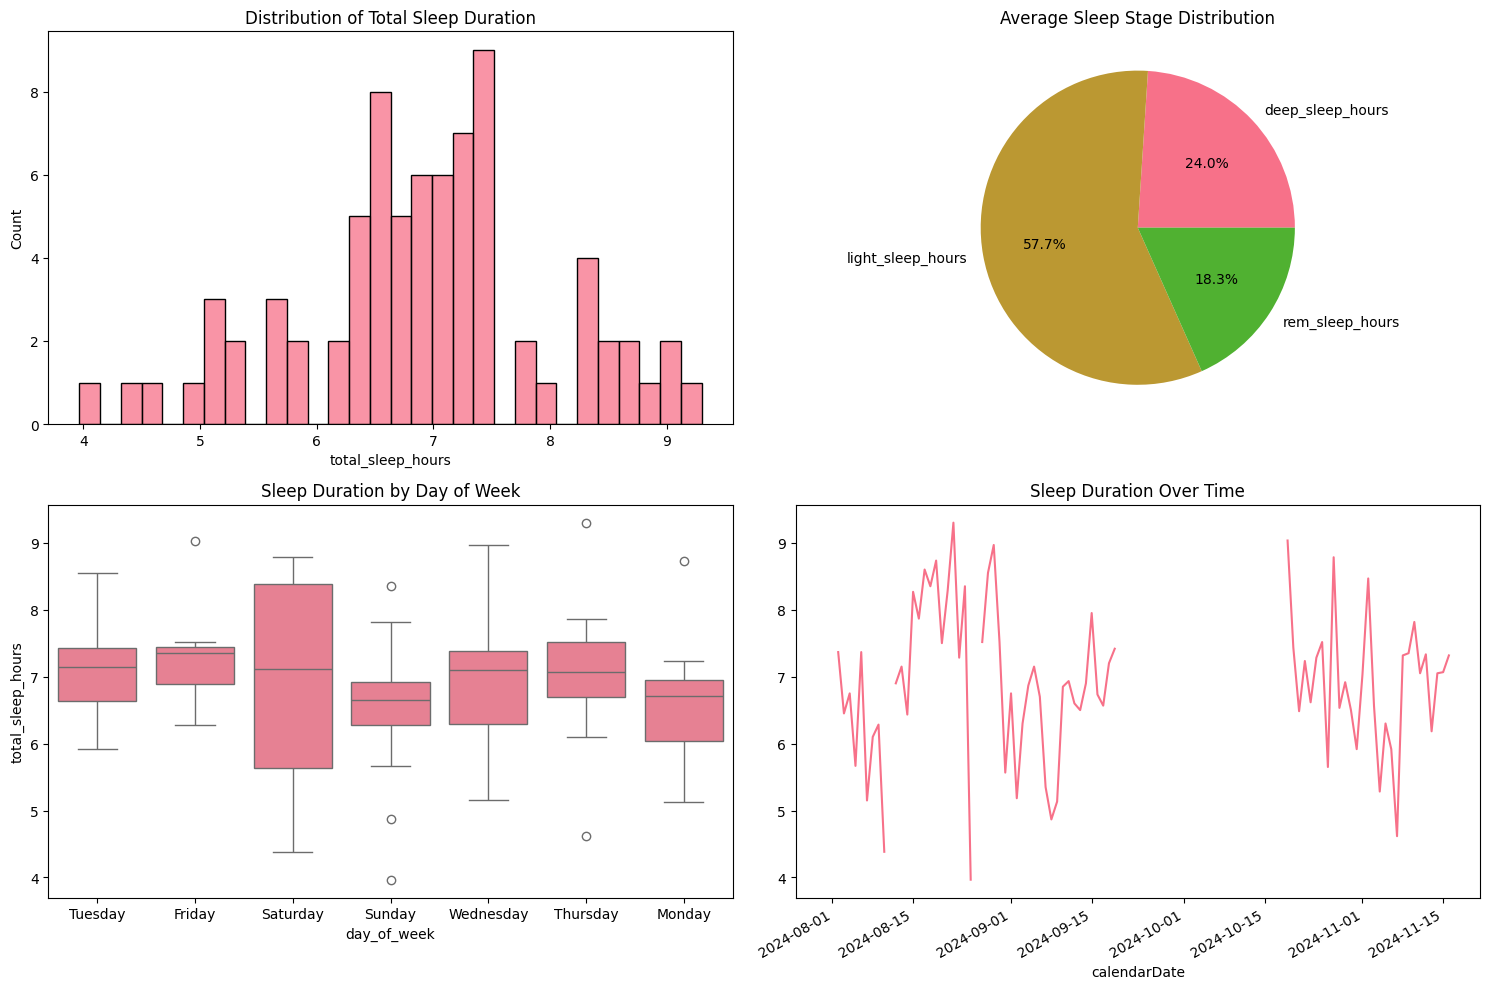

In [16]:
# Convert GMT to US/Pacific timezone
df['sleep_start'] = pd.to_datetime(df['sleepStartTimestampGMT']).dt.tz_localize('GMT').dt.tz_convert('US/Pacific')
df['sleep_end'] = pd.to_datetime(df['sleepEndTimestampGMT']).dt.tz_localize('GMT').dt.tz_convert('US/Pacific')

# Calculate sleep metrics
df['total_sleep_hours'] = (df['deepSleepSeconds'] + df['lightSleepSeconds'] + df['remSleepSeconds']) / 3600
df['deep_sleep_hours'] = df['deepSleepSeconds'] / 3600
df['light_sleep_hours'] = df['lightSleepSeconds'] / 3600
df['rem_sleep_hours'] = df['remSleepSeconds'] / 3600

# Add day of week analysis
df['day_of_week'] = df['sleep_start'].dt.day_name()
df['is_weekend'] = df['calendarDate'].dt.dayofweek.isin([5,6])

# Visualization: Sleep Patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sleep duration distribution
sns.histplot(data=df, x='total_sleep_hours', bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribution of Total Sleep Duration')

# Sleep stages
sleep_stages = df[['deep_sleep_hours', 'light_sleep_hours', 'rem_sleep_hours']].mean()
sleep_stages.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Average Sleep Stage Distribution')

# Day of week patterns
sns.boxplot(data=df, x='day_of_week', y='total_sleep_hours', ax=axes[1,0])
axes[1,0].set_title('Sleep Duration by Day of Week')
plt.xticks(rotation=45)

# Time series
df.set_index('calendarDate')['total_sleep_hours'].plot(ax=axes[1,1])
axes[1,1].set_title('Sleep Duration Over Time')

plt.tight_layout()
plt.show()

<div></div>

## 5. Time-Based Analysis

Analysis of sleep timing patterns and their impact on sleep quality.

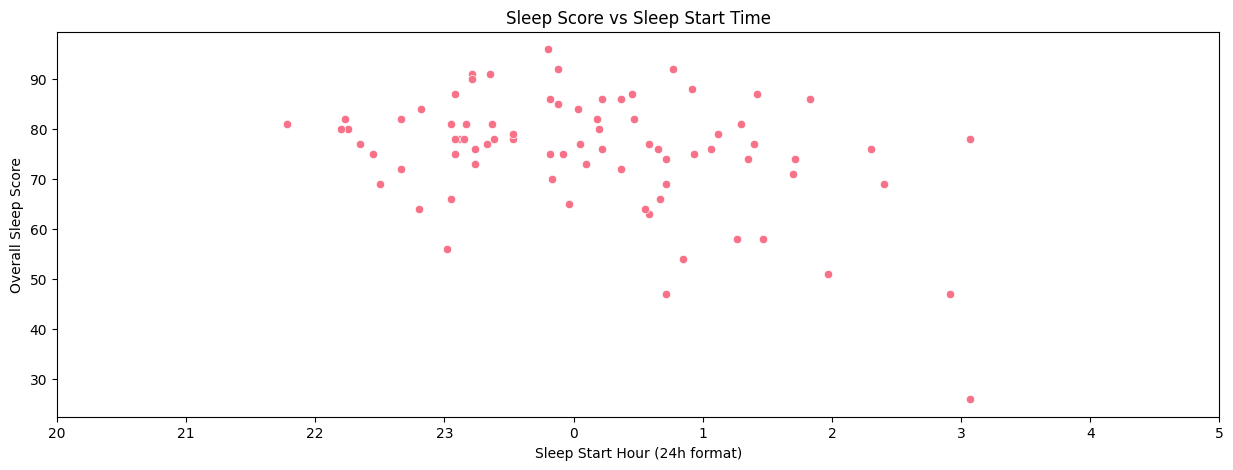

In [17]:
# Extract hour and normalize for visualization
df['sleep_start_hour'] = df['sleep_start'].dt.hour + df['sleep_start'].dt.minute/60
df['sleep_start_hour'] = df['sleep_start_hour'].apply(lambda x: x + 24 if x < 12 else x)

# Visualize sleep start time vs quality
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='sleep_start_hour', y='score_overallScore')
plt.title('Sleep Score vs Sleep Start Time')
plt.ylabel('Overall Sleep Score')
plt.xlabel('Sleep Start Hour (24h format)')
plt.xticks(range(20, 30, 1), [str(h % 24) for h in range(20, 30, 1)])
plt.show()

<div></div>

## 6. Correlation Analysis

Analyze relationships between different sleep metrics and scores.

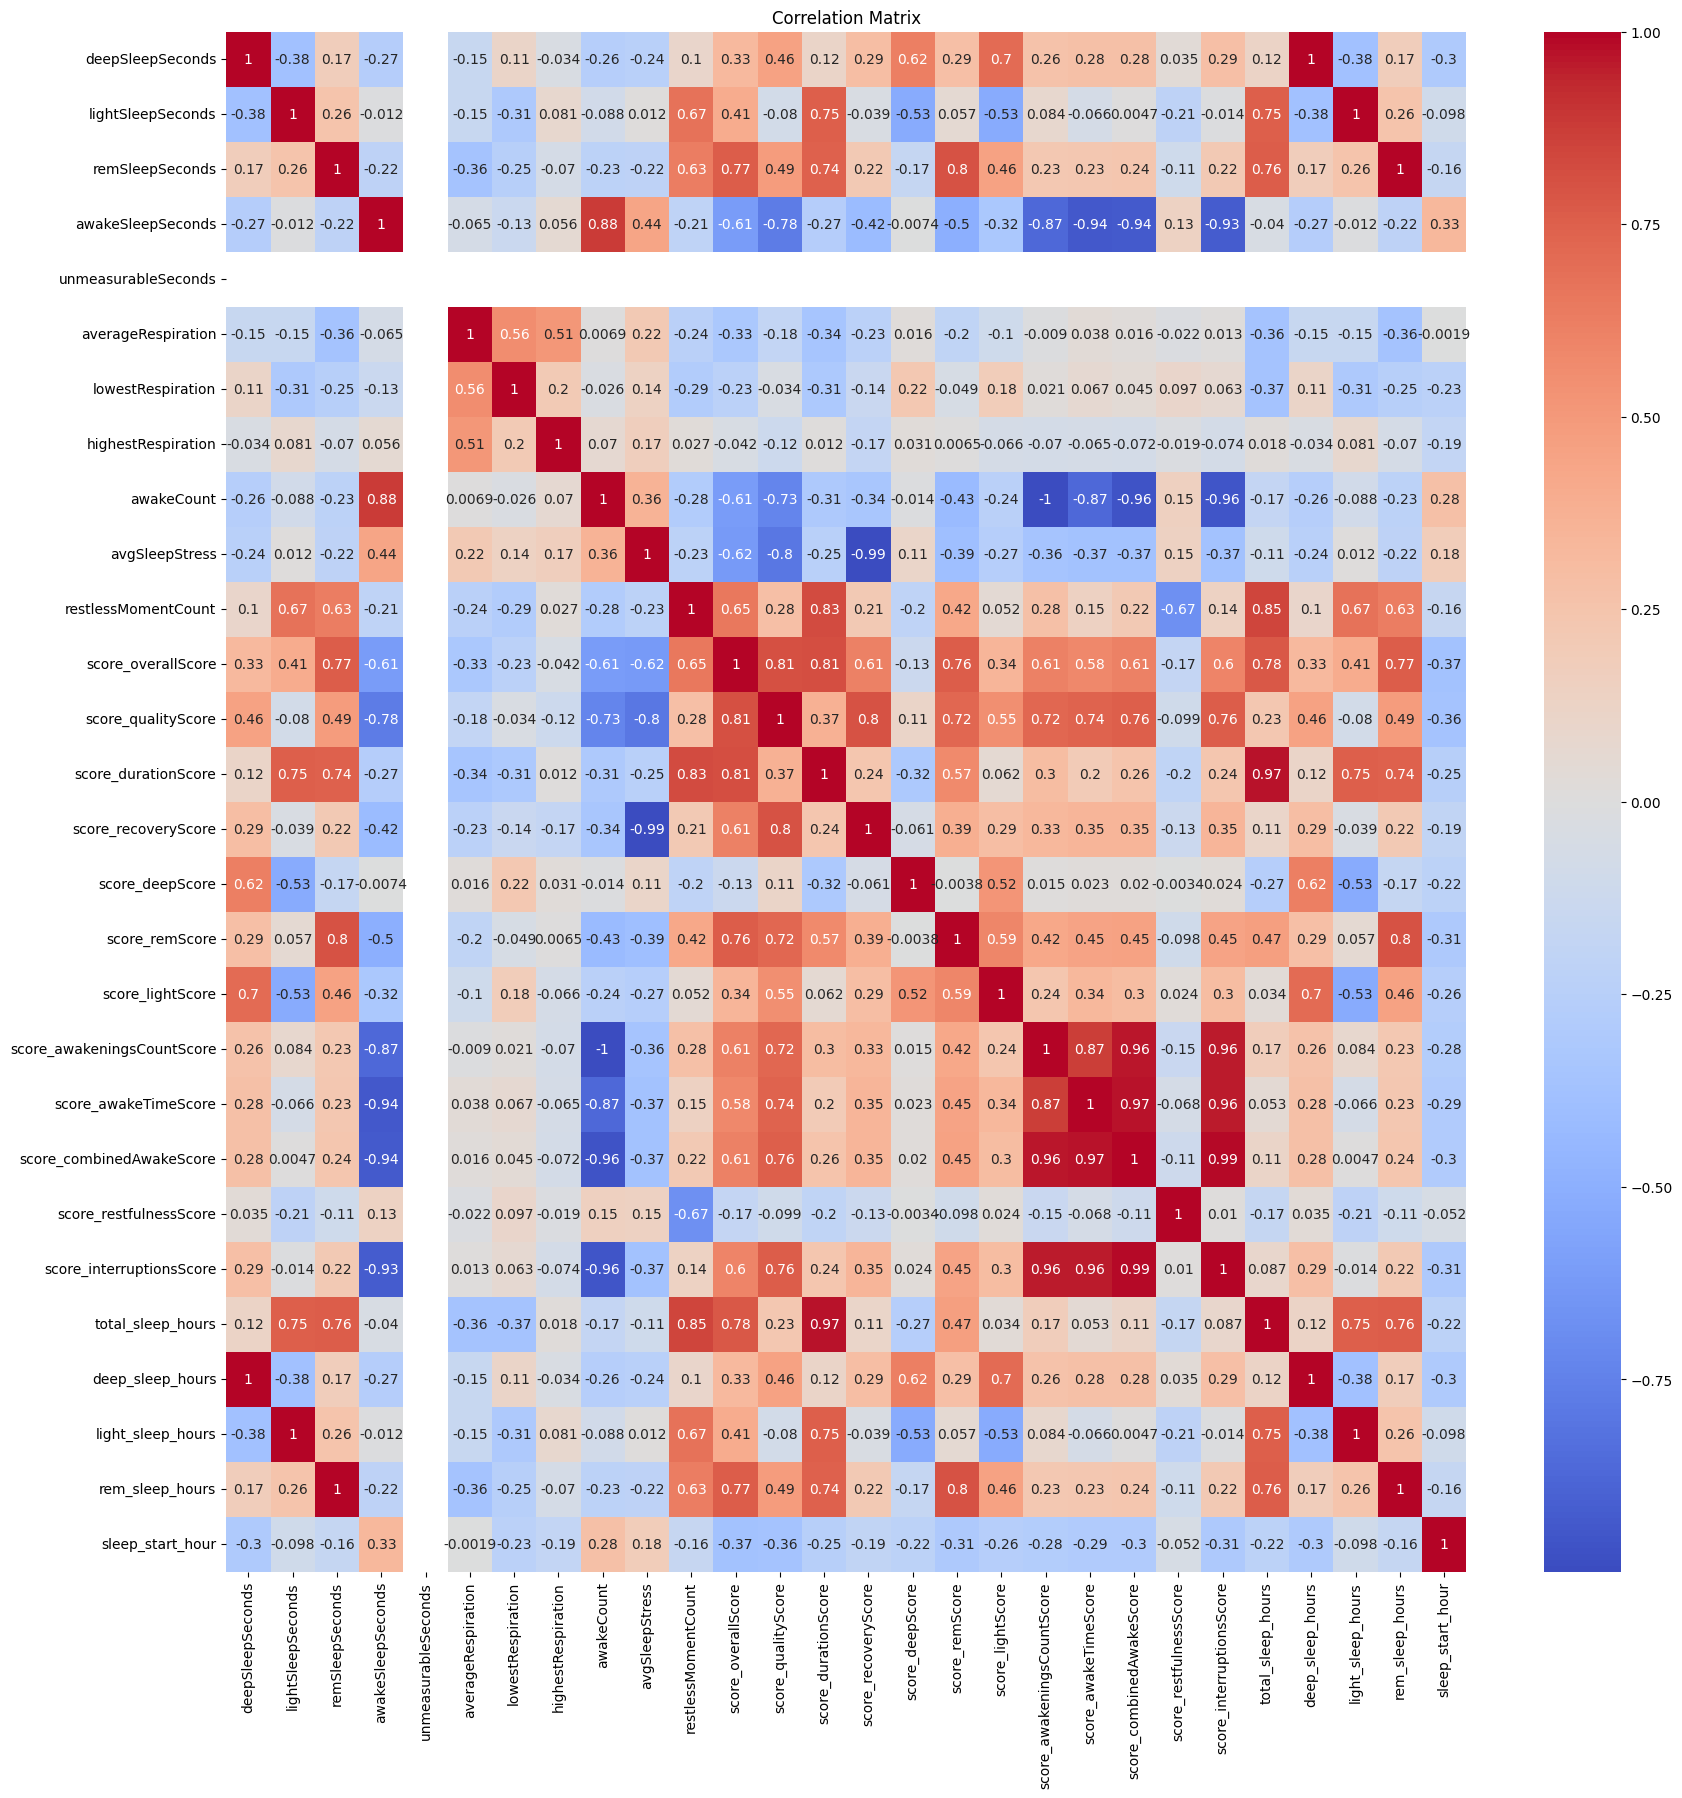

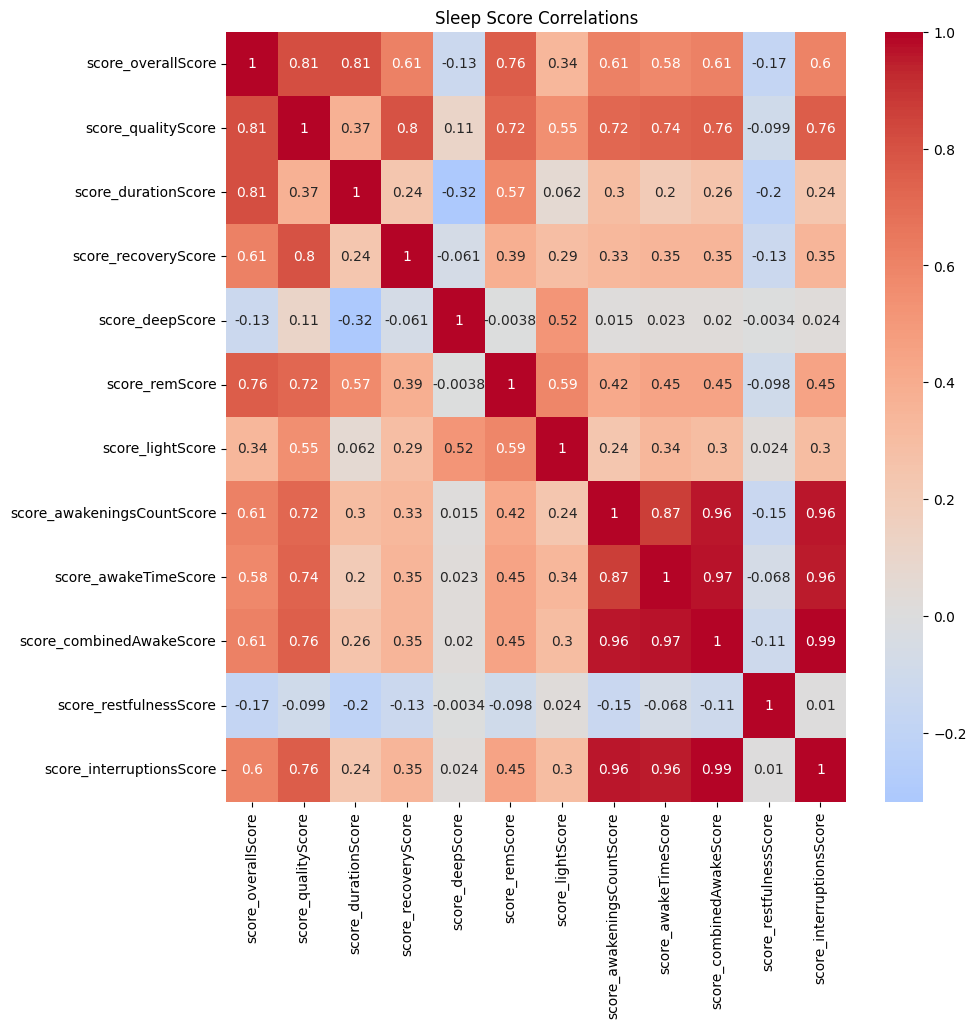

In [18]:
# Overall correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

# Sleep scores correlation
score_correlations = df[[f'score_{col}' for col in score_columns]].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(score_correlations, annot=True, cmap='coolwarm', center=0)
plt.title("Sleep Score Correlations")
plt.show()

<div></div>

## 6. Save the cleaned dataset

Export the cleaned dataset to a new CSV file for additional preprocessing and modeling.

In [19]:
df.to_csv('../../data/interim/sleep_data_eda_v1_with_time_features.csv', index=False)